In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_root_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          5.8079 ( 5.5324,  6.5754) ( 5.5230,  6.3805)  0.8575 (Jnode 106)\n',
 't_n56          5.7222 ( 5.3676,  6.4828) ( 5.3060,  6.3339)  1.0279 (Jnode 105)\n',
 't_n57          5.3767 ( 5.0311,  6.0967) ( 4.9640,  5.9447)  0.9807 (Jnode 104)\n',
 't_n58          4.7186 ( 4.3923,  5.3589) ( 4.3284,  5.2246)  0.8962 (Jnode 103)\n',
 't_n59          4.5374 ( 4.2180,  5.1467) ( 4.1632,  5.0345)  0.8713 (Jnode 102)\n',
 't_n60          4.3203 ( 4.0079,  4.9091) ( 3.9511,  4.7896)  0.8385 (Jnode 101)\n',
 't_n61          4.0238 ( 3.7162,  4.5745) ( 3.6660,  4.4736)  0.8075 (Jnode 100)\n',
 't_n62          2.1031 ( 1.8134,  2.4689) ( 1.7722,  2.4211)  0.6489 (Jnode 99)\n',
 't_n63          2.0832 ( 1.8445,  2.4246) ( 1.8198,  2.3768)  0.5570 (Jnode 98)\n',
 't_n64          1.2683 ( 1.1295,  1.4699) ( 1.1137,  1.4406)  0.3269 (Jnode 97)\n',
 't_n65          1.1044 ( 0.9806,  1.2794) ( 0.9661,  1.2568)  0.2907 (Jnode 96)\n',
 't_n66          0.8580 ( 0.7567,  1.0006) ( 0.7469,  0.98

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[5.8079,
 5.7222,
 5.3767,
 4.7186,
 4.5374,
 4.3203,
 4.0238,
 2.1031,
 2.0832,
 1.2683,
 1.1044,
 0.858,
 0.5836,
 0.3833,
 0.1502,
 1.558,
 4.4032,
 4.2121,
 3.916,
 2.7635,
 2.4868,
 1.4575,
 4.383,
 4.1832,
 4.0143,
 3.7586,
 3.4691,
 3.3669,
 3.0026,
 2.7372,
 2.5077,
 1.8829,
 1.7129,
 2.97,
 2.3928,
 4.2932,
 1.0897,
 4.1702,
 3.859,
 3.443,
 3.1877,
 2.2936,
 2.6959,
 3.2446,
 3.1147,
 2.8766,
 2.1282,
 3.1088,
 4.7275,
 2.5451,
 1.4297,
 1.7219,
 3.5665]

In [7]:
lower_ci_iqtree

[5.5324,
 5.3676,
 5.0311,
 4.3923,
 4.218,
 4.0079,
 3.7162,
 1.8134,
 1.8445,
 1.1295,
 0.9806,
 0.7567,
 0.5099,
 0.3281,
 0.122,
 1.3404,
 4.0876,
 3.8856,
 3.5953,
 2.4404,
 2.1698,
 1.1738,
 4.0738,
 3.8846,
 3.7186,
 3.4739,
 3.1997,
 3.1039,
 2.7536,
 2.4989,
 2.2788,
 1.6757,
 1.5097,
 2.6936,
 2.1187,
 3.9873,
 0.8924,
 3.8703,
 3.5689,
 3.1585,
 2.9119,
 2.0014,
 2.422,
 2.9565,
 2.8292,
 2.5912,
 1.8358,
 2.7924,
 4.348,
 2.1606,
 1.1677,
 1.439,
 3.0528]

In [8]:
upper_ci_iqtree

[6.5754,
 6.4828,
 6.0967,
 5.3589,
 5.1467,
 4.9091,
 4.5745,
 2.4689,
 2.4246,
 1.4699,
 1.2794,
 1.0006,
 0.6842,
 0.4558,
 0.1853,
 1.8441,
 4.9986,
 4.7912,
 4.4598,
 3.2098,
 2.9069,
 1.8134,
 4.9824,
 4.7558,
 4.5703,
 4.2761,
 3.9449,
 3.8269,
 3.4213,
 3.129,
 2.8649,
 2.1783,
 1.9952,
 3.3989,
 2.7658,
 4.882,
 1.3368,
 4.7415,
 4.3854,
 3.9273,
 3.6384,
 2.6757,
 3.1018,
 3.7059,
 3.5633,
 3.3032,
 2.5006,
 3.5747,
 5.3809,
 3.0342,
 1.7526,
 2.0758,
 4.2146]

In [9]:
file_LG = open("LG_root_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

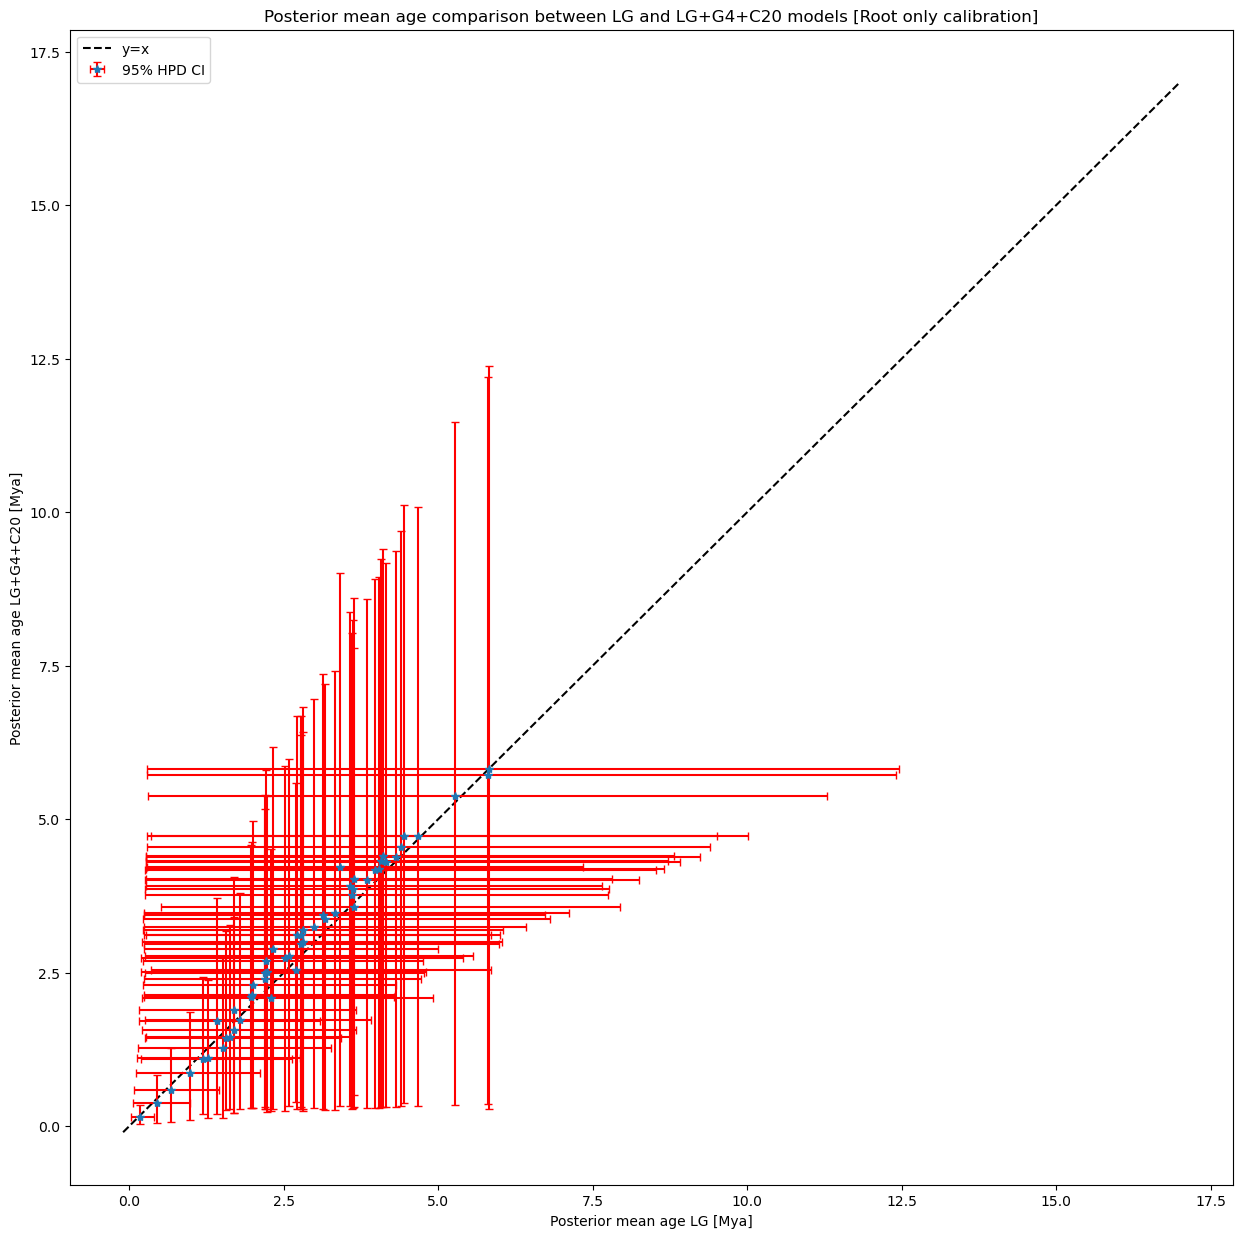

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_ro.png')

In [11]:
posterior_mean_baseml

[5.8205,
 5.7984,
 5.2736,
 4.6751,
 4.3892,
 4.0722,
 3.6435,
 1.9723,
 2.2851,
 1.5171,
 1.2812,
 0.9827,
 0.6728,
 0.4478,
 0.181,
 1.6958,
 4.1129,
 3.4125,
 3.5664,
 2.5795,
 2.2007,
 1.6278,
 4.3111,
 4.0368,
 3.8489,
 3.609,
 3.3234,
 3.1724,
 2.8096,
 2.5175,
 2.2327,
 1.7015,
 1.4258,
 2.7843,
 2.188,
 4.1579,
 1.1964,
 3.979,
 3.6183,
 3.1364,
 2.8174,
 1.9982,
 2.2086,
 2.9882,
 2.7195,
 2.3181,
 1.9875,
 2.7851,
 4.437,
 2.6902,
 1.5566,
 1.7897,
 3.6435]

In [12]:
posterior_mean_iqtree

[5.8079,
 5.7222,
 5.3767,
 4.7186,
 4.5374,
 4.3203,
 4.0238,
 2.1031,
 2.0832,
 1.2683,
 1.1044,
 0.858,
 0.5836,
 0.3833,
 0.1502,
 1.558,
 4.4032,
 4.2121,
 3.916,
 2.7635,
 2.4868,
 1.4575,
 4.383,
 4.1832,
 4.0143,
 3.7586,
 3.4691,
 3.3669,
 3.0026,
 2.7372,
 2.5077,
 1.8829,
 1.7129,
 2.97,
 2.3928,
 4.2932,
 1.0897,
 4.1702,
 3.859,
 3.443,
 3.1877,
 2.2936,
 2.6959,
 3.2446,
 3.1147,
 2.8766,
 2.1282,
 3.1088,
 4.7275,
 2.5451,
 1.4297,
 1.7219,
 3.5665]

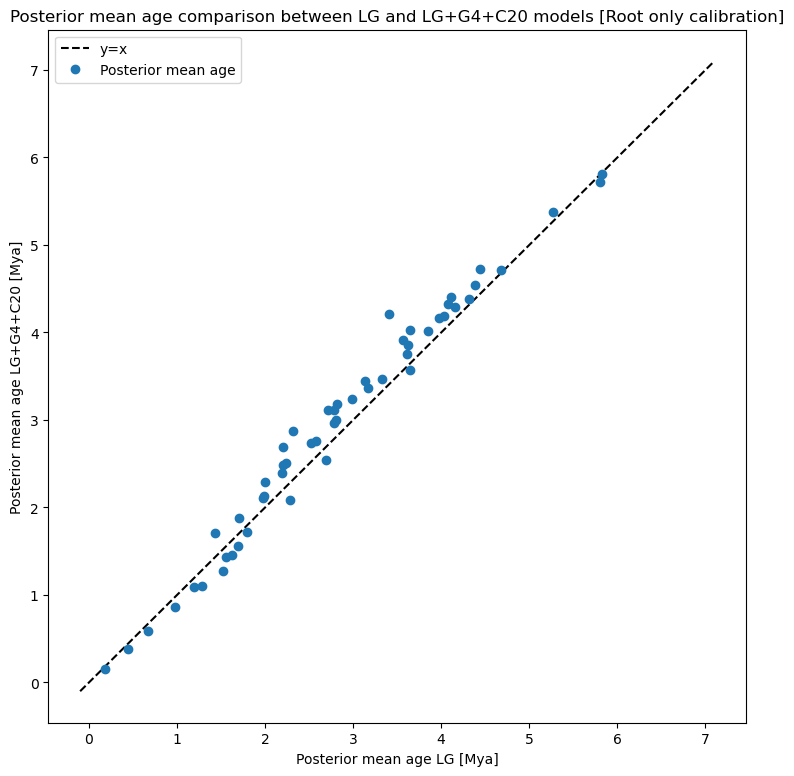

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,7.1], 
        [-0.1, 7.1], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_ro_scatter.png')